<a href="https://colab.research.google.com/github/tomasz-soltysiak/Fraud_transaction/blob/master/Fraud_dedection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import matplotlib.patches as mpatches
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.preprocessing import RobustScaler, StandardScaler
from sklearn.model_selection import train_test_split,StratifiedKFold
from sklearn.manifold import TSNE
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
from sklearn.metrics import recall_score, precision_score, f1_score, accuracy_score,roc_curve,confusion_matrix,roc_auc_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from keras.layers import Dense
from keras.layers import Dropout
from xgboost import XGBClassifier
from keras.models import Sequential
from keras.callbacks import EarlyStopping
from keras.layers import Dense
from keras.layers import Dropout
from imblearn.under_sampling import RandomUnderSampler

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


After adding libraries, I upload data.

In [4]:
df=pd.read_csv('/content/drive/My Drive/Colab Notebooks/data.csv')
df.head()

Time        V1        V2        V3  ...       V27       V28  Amount  Class
0  127614.0  2.004188 -0.287498 -1.984934  ... -0.121212 -0.064948   64.99      0
1  139389.0  2.346905 -1.264915 -1.034900  ...  0.015176 -0.058104    1.00      0
2   68482.0 -3.089671  2.464689  0.042745  ...  0.088944  0.026973   30.70      0
3  123677.0  1.792358 -0.384458 -2.170063  ... -0.117734 -0.061706  154.09      0
4  121222.0  2.188008 -0.400212 -1.627908  ... -0.063450 -0.071105   10.00      0

[5 rows x 31 columns]

In [5]:
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 213605 entries, 0 to 213604
Data columns (total 31 columns):
Time      213605 non-null float64
V1        213605 non-null float64
V2        213605 non-null float64
V3        213605 non-null float64
V4        213605 non-null float64
V5        213605 non-null float64
V6        213605 non-null float64
V7        213605 non-null float64
V8        213605 non-null float64
V9        213605 non-null float64
V10       213605 non-null float64
V11       213605 non-null float64
V12       213605 non-null float64
V13       213605 non-null float64
V14       213605 non-null float64
V15       213605 non-null float64
V16       213605 non-null float64
V17       213605 non-null float64
V18       213605 non-null float64
V19       213605 non-null float64
V20       213605 non-null float64
V21       213605 non-null float64
V22       213605 non-null float64
V23       213605 non-null float64
V24       213605 non-null float64
V25       213605 non-null float64
V26  

Time             V1  ...         Amount          Class
count  213605.000000  213605.000000  ...  213605.000000  213605.000000
mean    94763.710592       0.000761  ...      88.408696       0.001727
std     47521.370536       1.959843  ...     248.726927       0.041527
min         0.000000     -56.407510  ...       0.000000       0.000000
25%     54113.000000      -0.919923  ...       5.580000       0.000000
50%     84629.000000       0.019950  ...      22.000000       0.000000
75%    139282.000000       1.315599  ...      77.010000       0.000000
max    172792.000000       2.451888  ...   19656.530000       1.000000

[8 rows x 31 columns]

In [6]:
df=df.dropna(axis=0)
df.isnull().sum(axis=0)

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

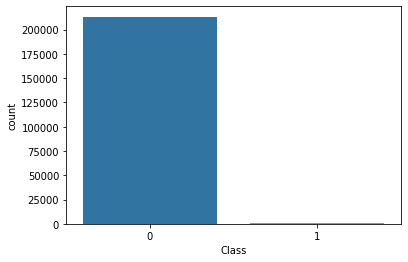

In [7]:
sns.countplot(df['Class'])


In [8]:
pd.Series(df['Class']).value_counts()

0    213236
1       369
Name: Class, dtype: int64

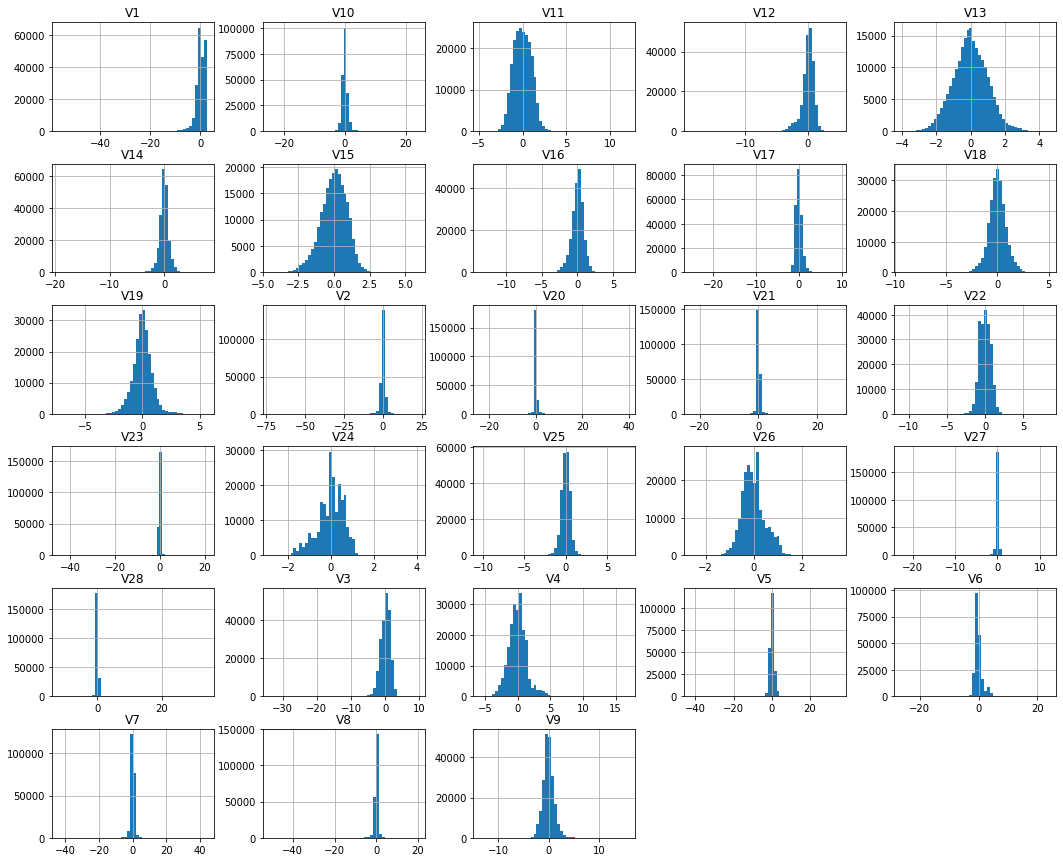

In [9]:
plot = df.drop(["Class", "Amount", "Time"], axis=1).hist(bins=50,
                                                         figsize=(18, 15));

"V1", "V2", "V5", "V6", "V7", "V8", "V10", "V12", "V11", "V14", "V16", "V17", "V15", "V20", "V21", "V23", "V27", "V28" - list of Variables that need to be checked.

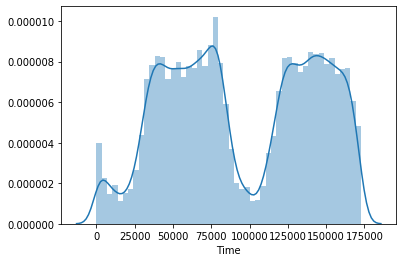

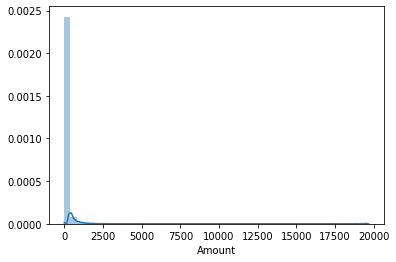

In [10]:
plt.figure()
sns.distplot(df['Time'])
plt.figure()
sns.distplot(df['Amount'])

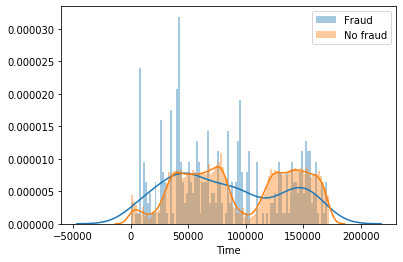

In [11]:
df_fraud=df[df['Class']==1]
df_nofraud=df[df['Class']==0]
sns.distplot(df_fraud['Time'],bins=100)
sns.distplot(df_nofraud['Time'],bins=100)
plt.legend(labels=['Fraud','No fraud'])

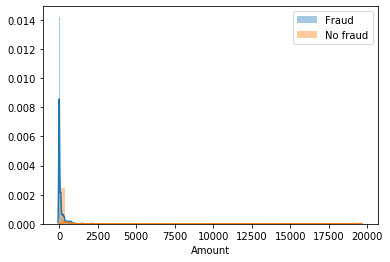

In [12]:
sns.distplot(df_fraud['Amount'])
sns.distplot(df_nofraud['Amount'])
plt.legend(labels=['Fraud','No fraud'])

Przybliżenie wykresu

(-100, 1500)

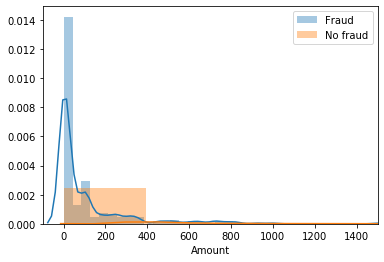

In [13]:
sns.distplot(df_fraud['Amount'])
sns.distplot(df_nofraud['Amount'])
plt.legend(labels=['Fraud','No fraud'])
plt.xlim(-100,1500)

Logarytmowanie kolumny "Amount"

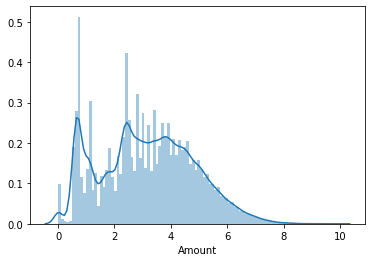

In [14]:
sns.distplot(np.log1p(df["Amount"]), bins=100)

Następnie podział na Fraud/No Fraud

(-1, 8.5)

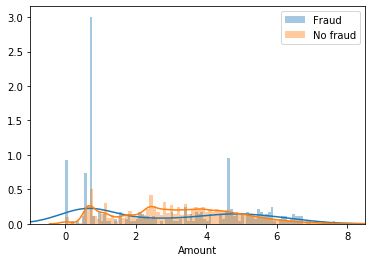

In [15]:
sns.distplot(np.log1p(df[df['Class']==1]["Amount"]), bins=100)
sns.distplot(np.log1p(df[df['Class']==0]["Amount"]), bins=100)
plt.legend(labels=['Fraud','No fraud'])
plt.xlim(-1,8.5)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:12: UserWarning: Legend does not support 'F' instances.
A proxy artist may be used instead.
See: http://matplotlib.org/users/legend_guide.html#creating-artists-specifically-for-adding-to-the-legend-aka-proxy-artists
  if sys.path[0] == '':
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:12: UserWarning: Legend does not support 'r' instances.
A proxy artist may be used instead.
See: http://matplotlib.org/users/legend_guide.html#creating-artists-specifically-for-adding-to-the-legend-aka-proxy-artists
  if sys.path[0] == '':
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:12: UserWarning: Legend does not support 'a' instances.
A proxy artist may be used instead.
See: http://matplotlib.org/users/legend_guide.html#creating-artists-specifically-for-adding-to-the-legend-aka-proxy-artists
  if sys.path[0] == '':
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:12: UserWarning: Legend does not sup

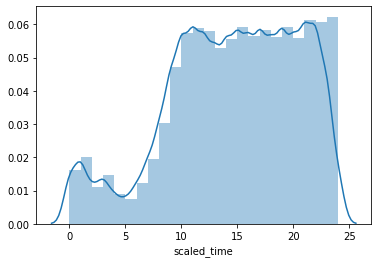

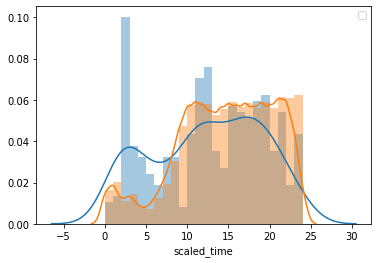

In [16]:
np.floor((172792/3600)%24)
np.floor((89000/3600)%24)

df['scaled_time']=round((df['Time']/3600)%24)
df_fraud=df[df['Class']==1]
df_nofraud=df[df['Class']==0]
df.head()
sns.distplot(df['scaled_time'], bins=24)
plt.figure()
sns.distplot(df_fraud['scaled_time'], bins=24)
sns.distplot(df_nofraud['scaled_time'], bins=24)
plt.legend('Fraud', 'No Fraud')

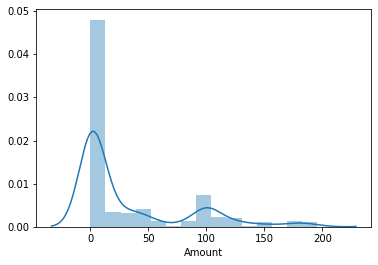

In [18]:

sns.distplot(df_fraud[df_fraud['Amount']<200]['Amount'])

In [19]:
df_fraud.info()
df_fraud.describe()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 369 entries, 1122 to 212910
Data columns (total 32 columns):
Time           369 non-null float64
V1             369 non-null float64
V2             369 non-null float64
V3             369 non-null float64
V4             369 non-null float64
V5             369 non-null float64
V6             369 non-null float64
V7             369 non-null float64
V8             369 non-null float64
V9             369 non-null float64
V10            369 non-null float64
V11            369 non-null float64
V12            369 non-null float64
V13            369 non-null float64
V14            369 non-null float64
V15            369 non-null float64
V16            369 non-null float64
V17            369 non-null float64
V18            369 non-null float64
V19            369 non-null float64
V20            369 non-null float64
V21            369 non-null float64
V22            369 non-null float64
V23            369 non-null float64
V24            369 non-nu

Time          V1          V2  ...       Amount  Class  scaled_time
count     369.000000  369.000000  369.000000  ...   369.000000  369.0   369.000000
mean    81742.769648   -4.586912    3.607730  ...   110.438157    1.0    12.344173
std     48471.700261    6.694782    4.312807  ...   221.502314    0.0     6.649062
min       406.000000  -29.876366   -8.402154  ...     0.000000    1.0     0.000000
25%     41313.000000   -5.839192    1.189757  ...     1.000000    1.0     7.000000
50%     75033.000000   -2.303350    2.708535  ...     9.820000    1.0    12.000000
75%    129308.000000   -0.361428    4.864535  ...   105.990000    1.0    18.000000
max    170348.000000    2.132386   22.057729  ...  2125.870000    1.0    24.000000

[8 rows x 32 columns]

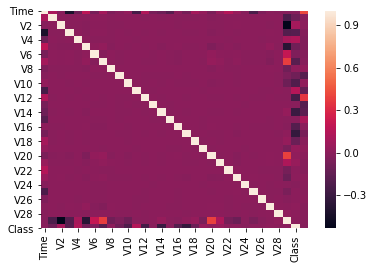

In [20]:
sns.heatmap(df.corr())

In [21]:
Rob_scaler=RobustScaler()

df['scaled_Amount']=Rob_scaler.fit_transform(df['Amount'].values.reshape(-1,1))
df.head()

Time        V1        V2  ...  Class  scaled_time  scaled_Amount
0  127614.0  2.004188 -0.287498  ...      0         11.0       0.601848
1  139389.0  2.346905 -1.264915  ...      0         15.0      -0.293994
2   68482.0 -3.089671  2.464689  ...      0         19.0       0.121798
3  123677.0  1.792358 -0.384458  ...      0         10.0       1.849223
4  121222.0  2.188008 -0.400212  ...      0         10.0      -0.167997

[5 rows x 33 columns]

In [22]:
df['scaled_Amount'].describe()

count    213605.000000
mean          0.929703
std           3.482107
min          -0.307994
25%          -0.229875
50%           0.000000
75%           0.770125
max         274.877922
Name: scaled_Amount, dtype: float64

Jakub: Jak widać mamy niezbalansowane dane. Jest w sumie 284315 rekordów oznaczonych jako nie fraudy oraz 492 fraudów. Sposobem na poradzenie sobie z tym problemem jest są metody zwane Oversampling oraz Undersampling. Jak w przypadku Undersamplingu nie ma problemu jeśli chodzi o wiarygodność danych, tak w Oversamplingu jest trochę inaczej, ponieważ sztucznie dodajemy na podstawie pewnych funckji. To może spowodować że nasz model w przypadku nowej testowej bazy danych będzie mniej skuteczny. Dlatego nasz projekt będzie uwzględniał trzy metody Undersampling, Oversampling oraz Oversampling z wykorzystaniem SMOTE.

In [0]:
pca_list = list(df.columns.values)
pca_list.remove('Time')
pca_list.remove('Amount')
pca_list.remove('Class')
pca_list.remove('scaled_time')
pca_list.remove('scaled_Amount')

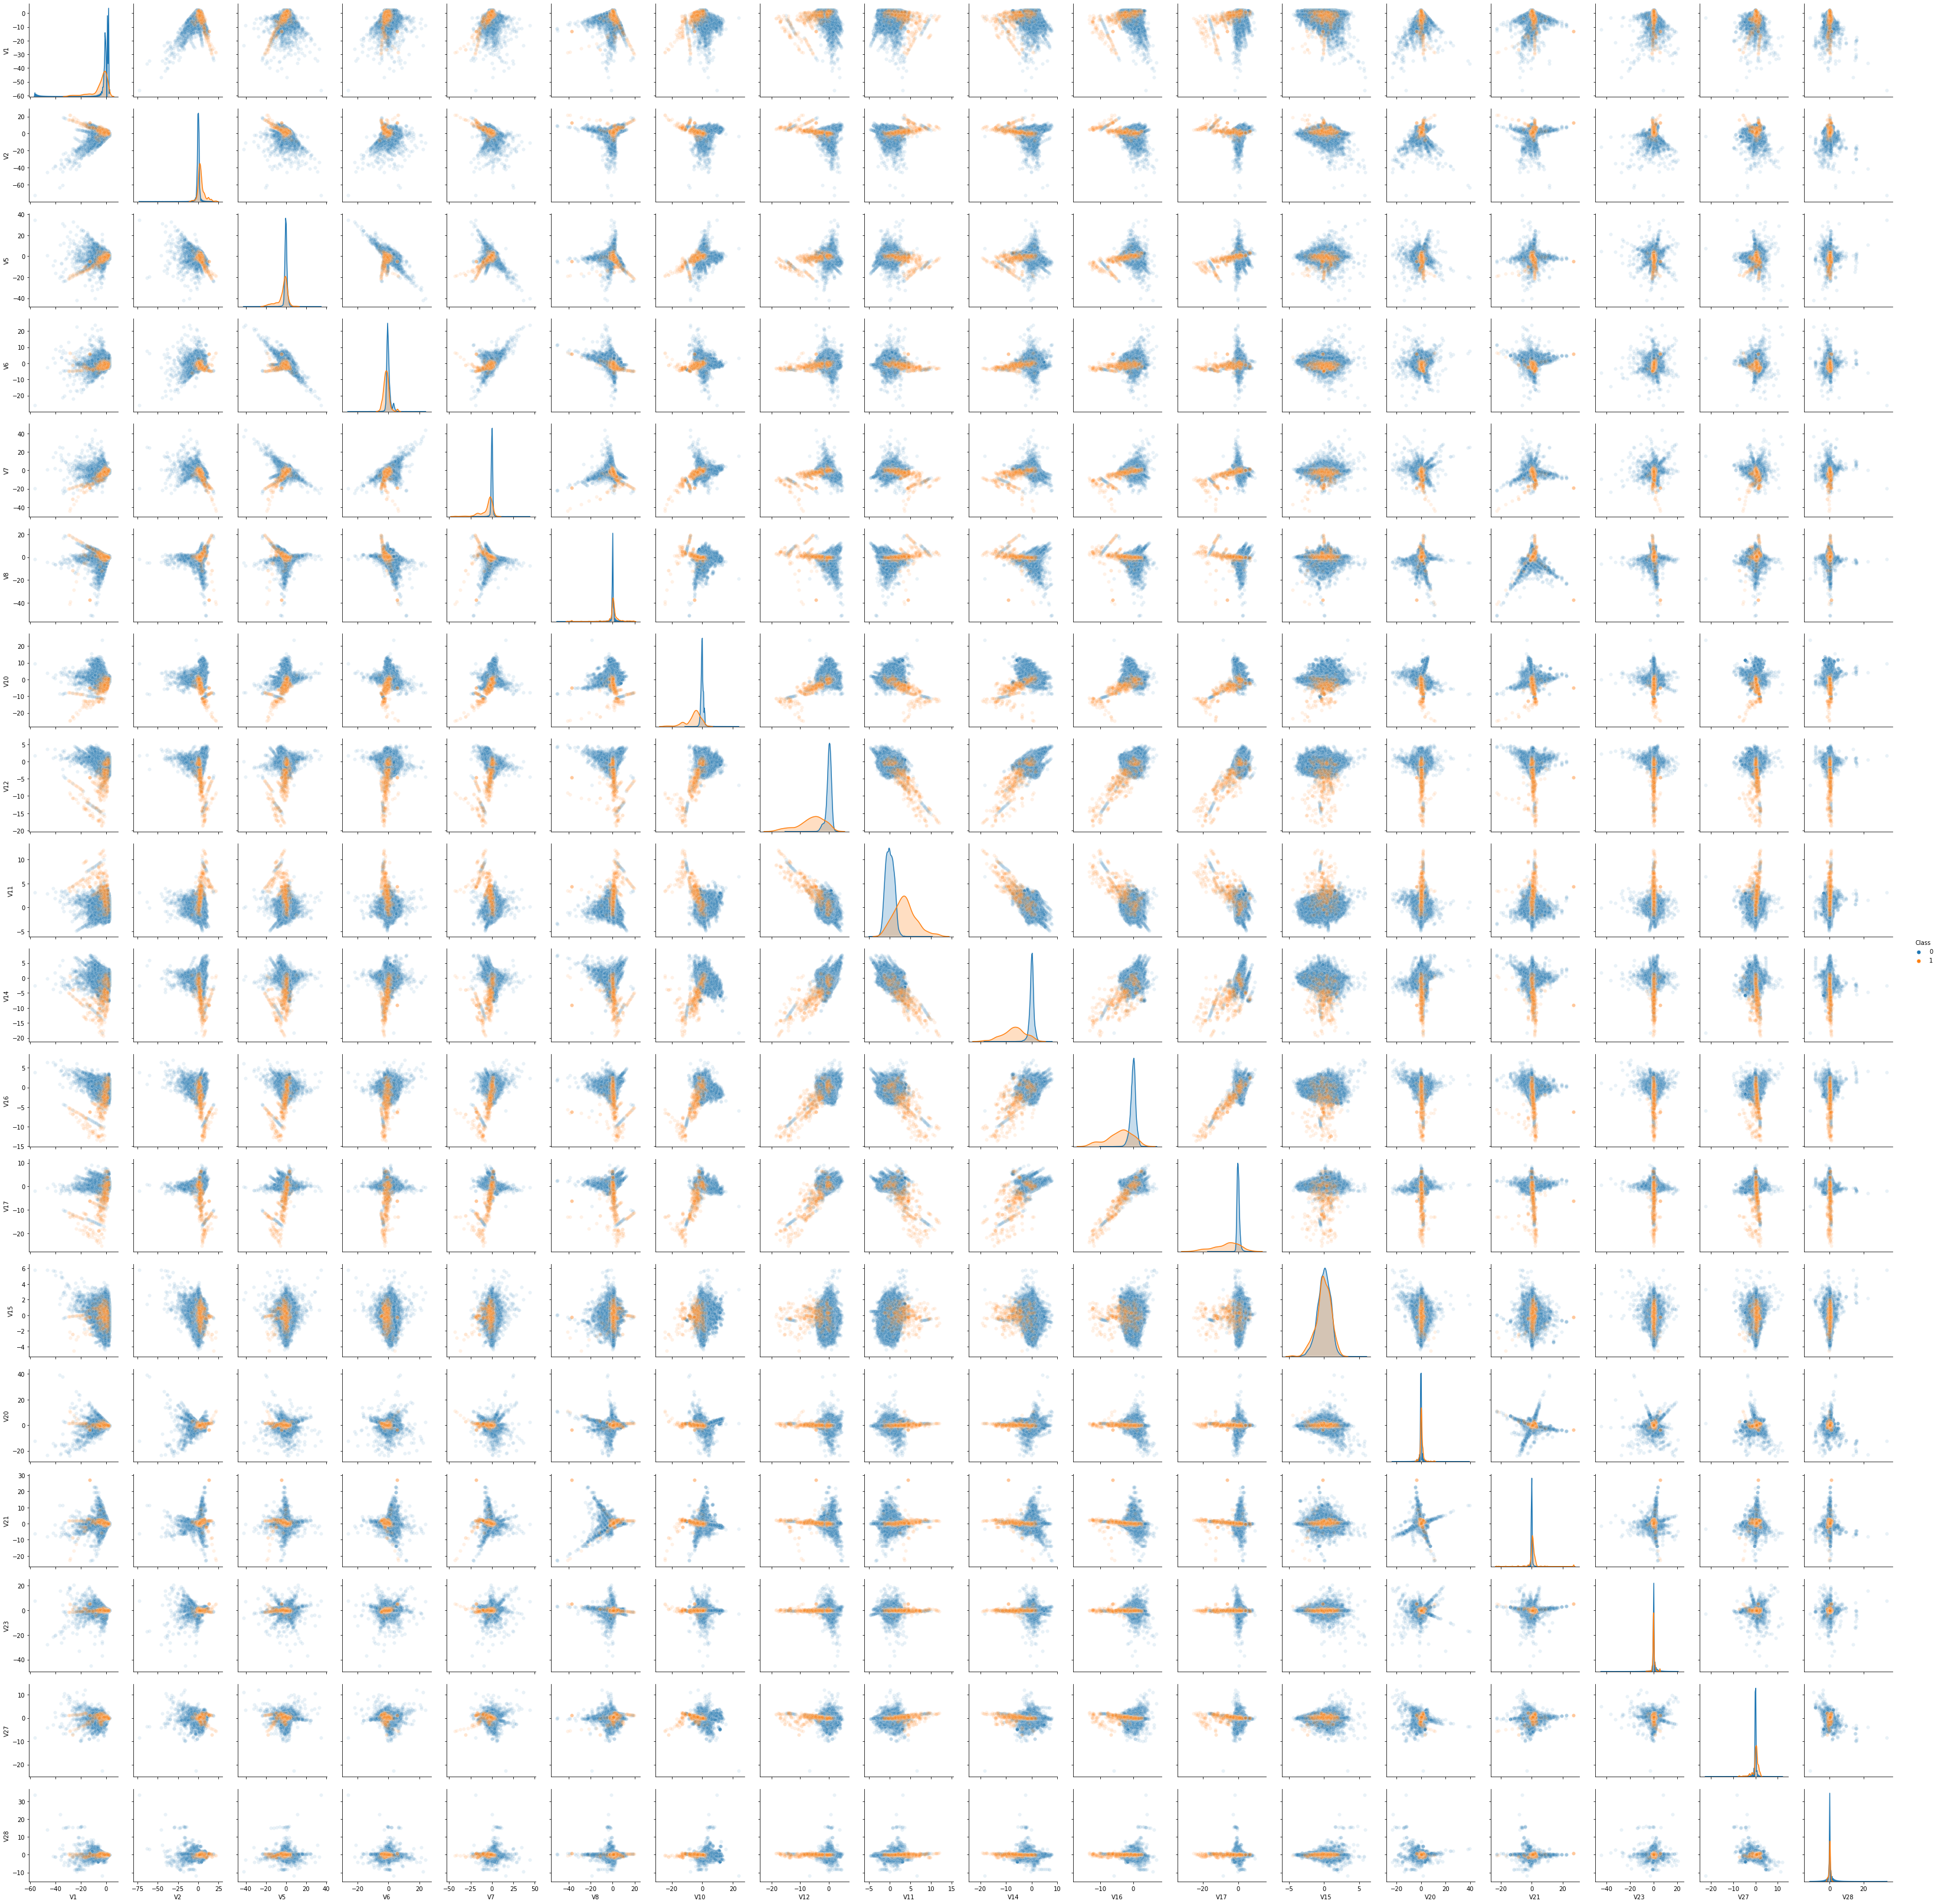

In [23]:
g = sns.pairplot(df, vars = ["V1", "V2", "V5", "V6", "V7", "V8", "V10", "V12", "V11", "V14", "V16", "V17", "V15", "V20", "V21", "V23", "V27", "V28"], hue='Class',
             plot_kws={"alpha": 0.1});


for lh in g._legend.legendHandles: 
    lh.set_alpha(1)
    lh._sizes = [50]

Pierwszą z pokazanych metod był undersampling.


In [24]:

rus = RandomUnderSampler(random_state=0)
pca_cols = df.iloc[:, 0:32]
X_resampled, y_resampled = rus.fit_resample(pca_cols, df['Class'])
X_resampled_cols = list(df.columns.values)
X_resampled_cols.remove('Class')
df_unsmpl = pd.DataFrame(X_resampled, columns=X_resampled_cols)
df_unsmpl['Class'] = pd.DataFrame(y_resampled)

/usr/local/lib/python3.6/dist-packages/sklearn/externals/six.py:31: DeprecationWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", DeprecationWarning)


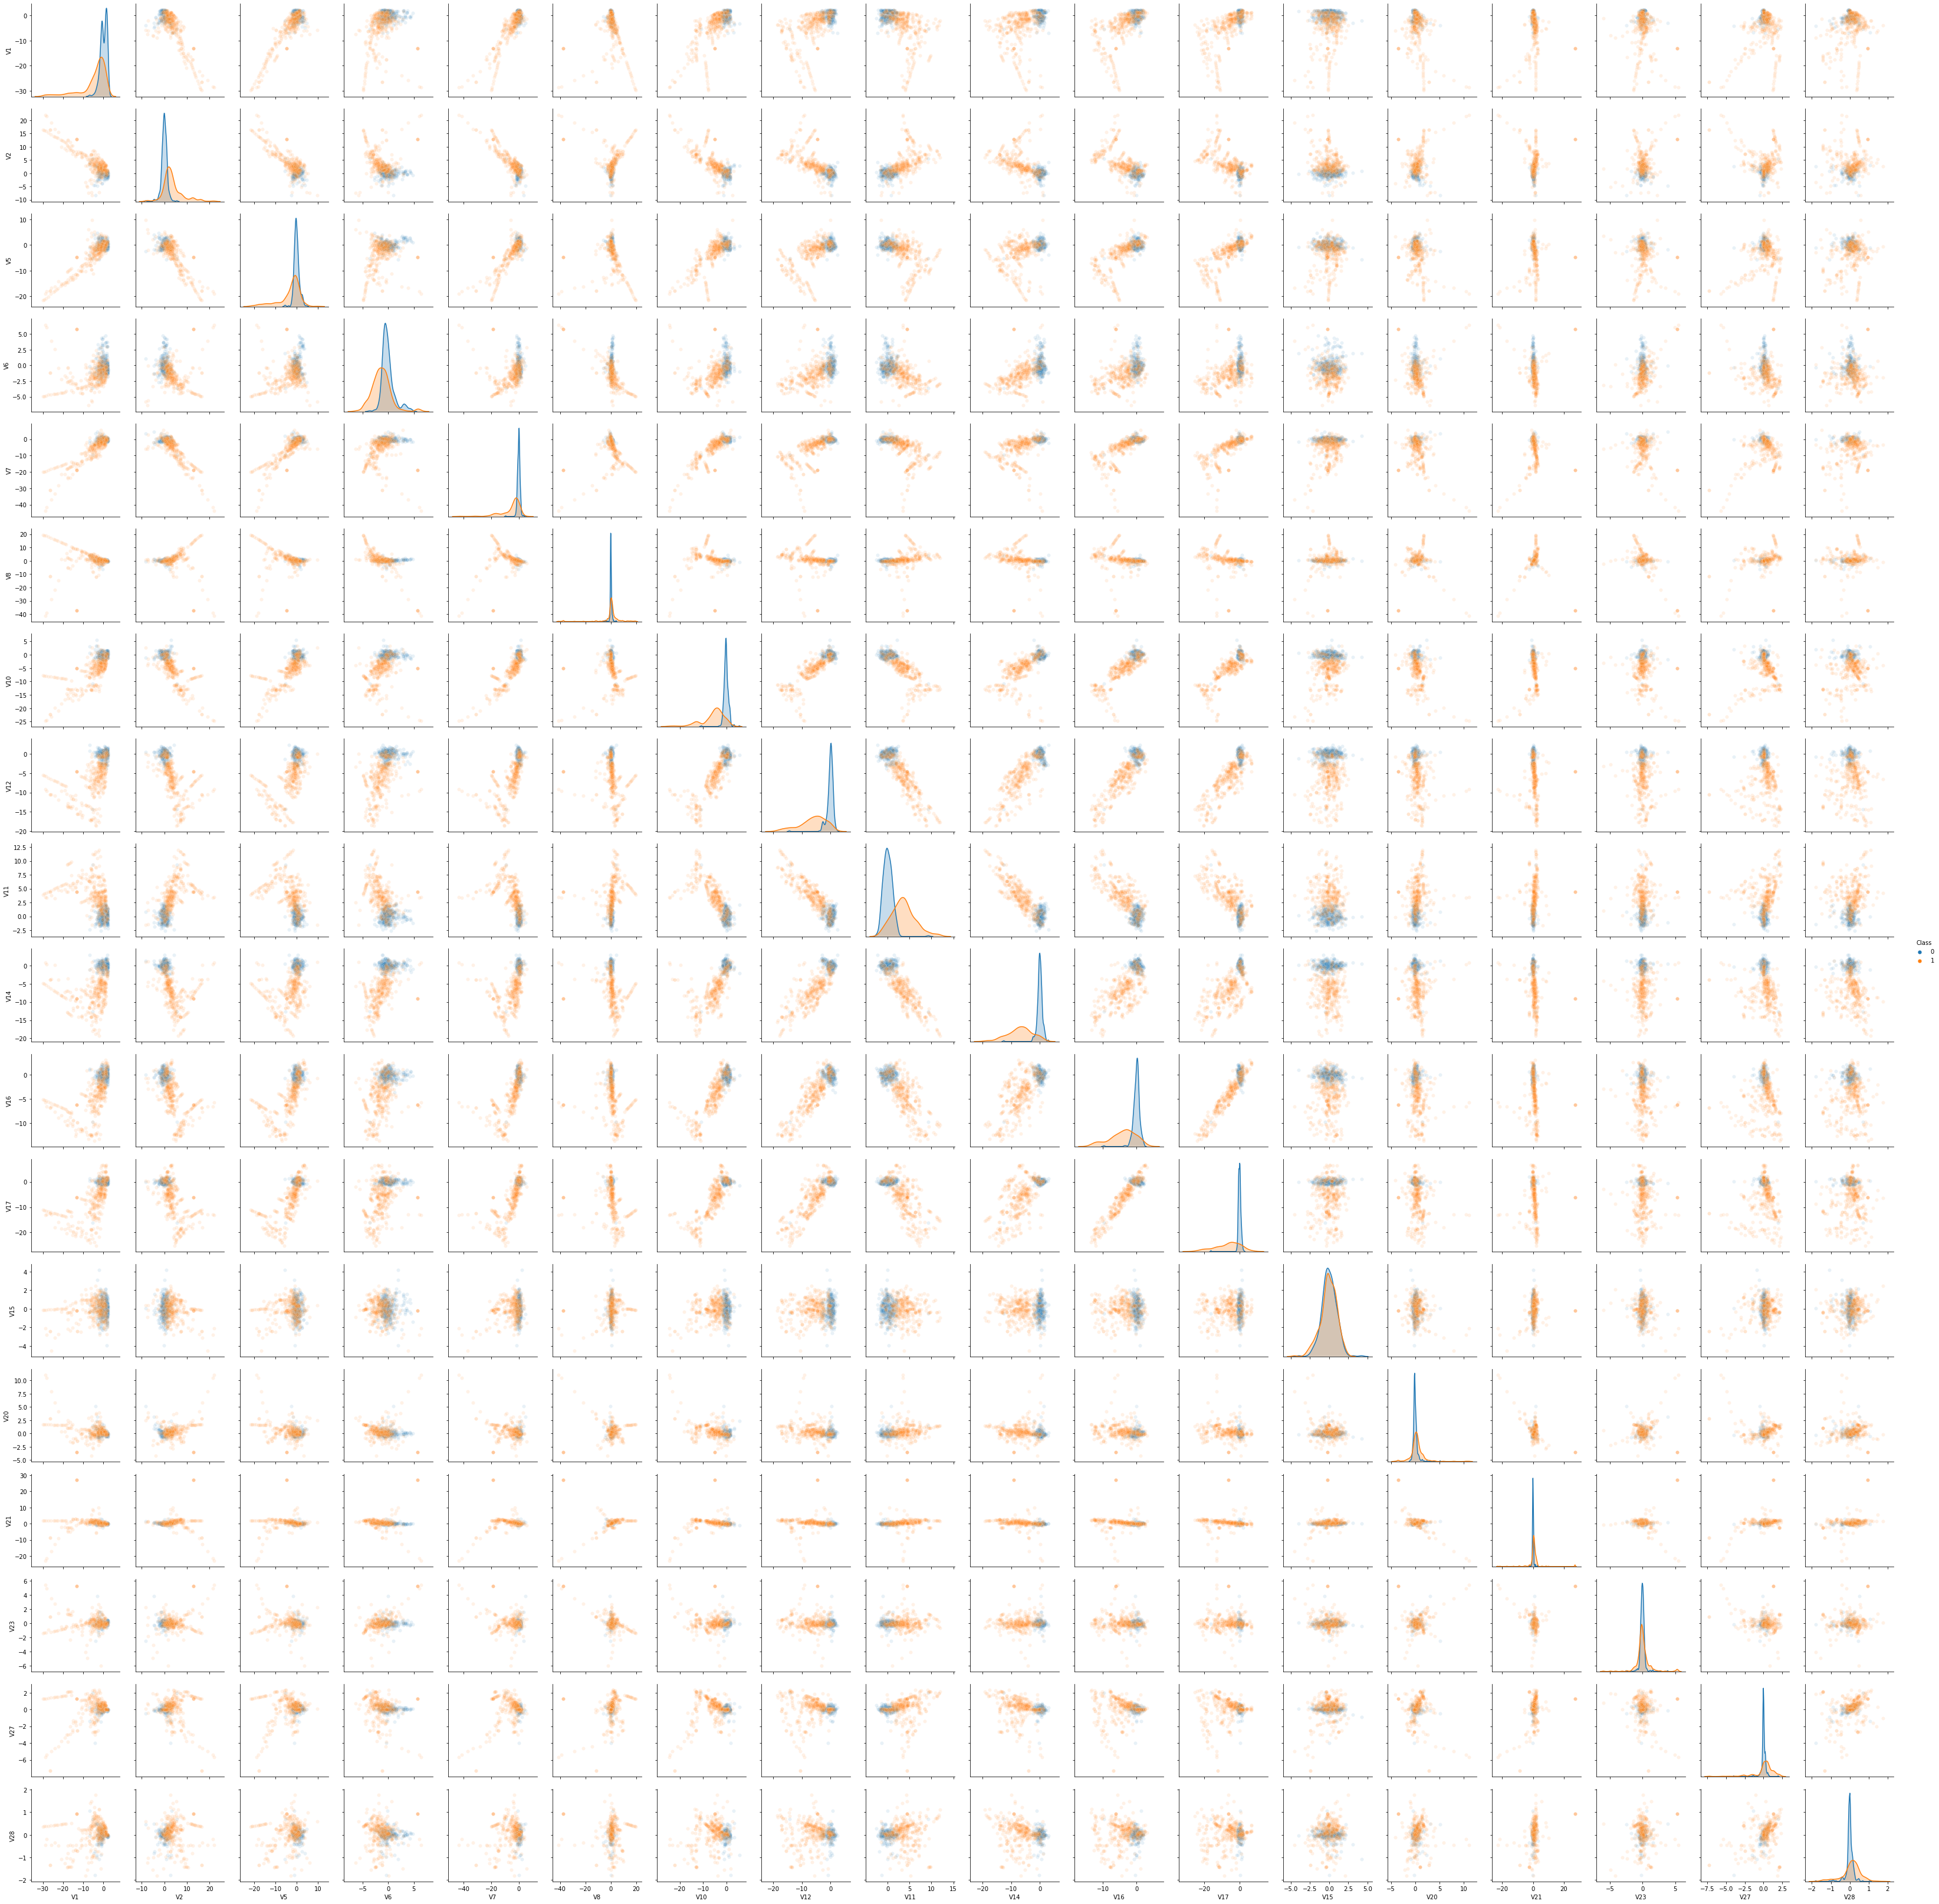

In [27]:
u = sns.pairplot(df_unsmpl, vars = ["V1", "V2", "V5", "V6", "V7", "V8", "V10", "V12", "V11", "V14", "V16", "V17", "V15", "V20", "V21", "V23", "V27", "V28"],
                 plot_kws={"alpha": 0.1},  hue='Class');


for lh in u._legend.legendHandles: 
    lh.set_alpha(1)
    lh._sizes = [50]

Teraz wczytamy 5 modeli, na których nauczyliśmy nasze dane.